## Описание проекта

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

### Шаг 1. Откроем файл с данными и изучим общую информацию


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats as st

In [2]:
# для просмотра офлайн
#df = pd.read_csv('datasets/games.csv')
# для просмотра онлайн на я.практикуме
df = pd.read_csv('/datasets/games.csv')

5 случайных строк датасета для общего понимания, как он выглядит:

In [3]:
df.sample(5)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
5193,Mobile Suit Z-Gundam,PS,1997.0,Action,0.00,0.00,0.34,0.02,NaN,NaN,NaN
4390,Naruto Shippuden: Ultimate Ninja Storm Generat...,X360,2012.0,Fighting,0.26,0.14,0.01,0.04,74.0,7.2,T
7302,Pandemonium!,PS,1996.0,Platform,0.12,0.08,0.00,0.01,NaN,NaN,NaN
5425,Imagine: Movie Star,DS,2008.0,Simulation,0.31,0.00,0.00,0.03,NaN,tbd,E
2454,Tales of Xillia 2,PS3,2012.0,Role-Playing,0.20,0.12,0.45,0.07,71.0,7.9,T


Краткая информация о данных:

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


6/11 столбцов имеют пропуски. Как минимум, `Year_of_Release`, `Critic_Score`  необходимо привести к `int`.

Так же нужно разобраться с `User_Score ` и значениями `tbd`.


Количество пропусков в процентном соотношении:

In [5]:
(df.isnull().mean() * 100).round(2).sort_values(ascending = False)

Critic_Score       51.32
Rating             40.48
User_Score         40.09
Year_of_Release     1.61
Genre               0.01
Name                0.01
Other_sales         0.00
JP_sales            0.00
EU_sales            0.00
NA_sales            0.00
Platform            0.00
dtype: float64


Посмотрим на данные через `describe()`

In [6]:
df.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


Количество различных игр в датафрейме:

In [7]:
len(df['Name'].unique())

11560

Топ-10 наиболее частых:

In [8]:
df['Name'].value_counts().head(10)

Need for Speed: Most Wanted     12
LEGO Marvel Super Heroes         9
Ratatouille                      9
Madden NFL 07                    9
FIFA 14                          9
Madden NFL 08                    8
Monopoly                         8
Lego Batman 3: Beyond Gotham     8
FIFA Soccer 13                   8
LEGO Harry Potter: Years 5-7     8
Name: Name, dtype: int64

Количество различных платформ:

In [9]:
len(df['Platform'].unique())

31

Весь список платформ от наиболее популярных:

In [10]:
df['Platform'].value_counts()

PS2     2161
DS      2151
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      430
PS4      392
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
GB        98
NES       98
DC        52
GEN       29
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: Platform, dtype: int64

Количество различных жанров:

In [11]:
len(df['Genre'].unique())

13

In [12]:
df['Genre'].value_counts()

Action          3369
Sports          2348
Misc            1750
Role-Playing    1498
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       873
Fighting         849
Strategy         683
Puzzle           580
Name: Genre, dtype: int64

Количество возрастных категорий от ESRB:

In [13]:
len(df['Rating'].unique())

9

In [14]:
df['Rating'].value_counts()

E       3990
T       2961
M       1563
E10+    1420
EC         8
K-A        3
RP         3
AO         1
Name: Rating, dtype: int64

Количество дубликатов:

In [15]:
df.duplicated().sum()

0

### Вывод:

Данные длиною в 16715 строк и 11 столбцов. При этом 6 из 11 столбцов имеют пропуски.

Экземпляры с пропусками в `Name` и `Genre` придётся удалить, т.к. восстановить такие данные достаточно сложно. 0.01% удалений не должен сказаться на качестве данных.

Столбцы `Critic_Score`, `User_Score` и `Rating` имеют долю пропусков 40-50%. От этих пропусков планируется избавляться на основании данных по тем же играм, но на других платформах. Если не получится – анализировать 50% данных без пропусков. 

`Year_of_Release`  и `Critic_Score` необходимо прести к `int`, а в `User_Score` избавиться от `tbd` и привести к `float`.

Приведены списки наиболее часто встречающихся игр/платформ/жанров. Однако частое повторение не обязательно влечёт за собой прибыль или высокие рейтинги. Сортировать по прибыли или рейтингам будем далее, при исследовательском анализе данных.

Явных дубликатов не обнаружено, однако это нужно будет проверить ещё раз после предобработки.


### Шаг 2. Подготовка данных

#### Замена названия столбцов

Приведём названия столбцов к нижнему регистру

In [16]:
df.columns = df.columns.str.lower()

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16446 non-null float64
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null float64
user_score         10014 non-null object
rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Начнём с малого – меньше всего пропусков в `name` и `genre`:

In [18]:
df[df['name'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Как можно заметить, это пропуски в столбцах `name` и `genre` возникли одновременно

Информации про эту платформу практически нет, а заполнять жанр без названия игры или, тем более, название игры без жанра, нереально

In [19]:
df.drop(df[df['name'].isnull()].index , inplace=True)

Заполним пропуски в `year_of_release`. Для начала посмотрим на примеры с пропусками:

In [20]:
df.loc[df['year_of_release'].isnull()].head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN


Их количество:

In [21]:
len(df.loc[df['year_of_release'].isnull()])

269

На каких платформах чаще всего отсутствует дата релиза?

In [22]:
df.loc[df['year_of_release'].isnull()]['platform'].value_counts()

Wii     34
PS2     34
DS      30
X360    30
PS3     25
XB      21
2600    17
PC      17
PSP     16
GC      14
GBA     11
3DS      8
PS       7
N64      3
PSV      1
GB       1
Name: platform, dtype: int64

Позиция PS2 достаточно предсказуема, а вот Wii и X360 – нет, потому что игр на этих платформах почти на 1000 меньше, чем у PS2 и DS

___
Выходили ли игры, у которых пропущен год релиза, на других платформах?

Проверим первые 3 из `df.loc[df['year_of_release'].isnull()].head()`:

In [23]:
df.loc[df['name'] == 'Madden NFL 2004']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
1881,Madden NFL 2004,XB,2003.0,Sports,1.02,0.02,0.00,0.05,92.0,8.3,E
3889,Madden NFL 2004,GC,2003.0,Sports,0.40,0.10,0.00,0.01,94.0,7.7,E
5708,Madden NFL 2004,GBA,2003.0,Sports,0.22,0.08,0.00,0.01,70.0,6.6,E


In [24]:
df.loc[df['name'] == 'FIFA Soccer 2004']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
2606,FIFA Soccer 2004,XB,2003.0,Sports,0.24,0.49,0.00,0.05,82.0,8.2,E
12029,FIFA Soccer 2004,GC,2003.0,Sports,0.05,0.01,0.00,0.00,83.0,6.2,E
13086,FIFA Soccer 2004,GBA,2003.0,Sports,0.04,0.01,0.00,0.00,82.0,7.9,E


In [25]:
df.loc[df['name'] == 'LEGO Batman: The Videogame']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
397,LEGO Batman: The Videogame,X360,2008.0,Action,2.04,1.02,0.0,0.32,76.0,7.9,E10+
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.0,0.29,74.0,7.9,E10+
460,LEGO Batman: The Videogame,DS,2008.0,Action,1.75,1.01,0.0,0.29,72.0,8,E10+
1519,LEGO Batman: The Videogame,PS3,2008.0,Action,0.72,0.39,0.0,0.19,75.0,7.7,E10+
1538,LEGO Batman: The Videogame,PSP,NaN,Action,0.57,0.44,0.0,0.27,73.0,7.4,E10+
1553,LEGO Batman: The Videogame,PS2,2008.0,Action,0.72,0.03,0.0,0.52,77.0,8.9,E10+
12465,LEGO Batman: The Videogame,PC,2008.0,Action,0.02,0.03,0.0,0.01,80.0,7.8,E10+


Получается, одна игра запускается сразу на нескольких платформах. И, по наблюдениям, год выхода совпадает. 

Конечно, возможен выход с разницей +/- 1-3 года. Но пропусков `year_of_release` всего 1.61%.

Так что метод заполнения по годам платформ без пропуска не должен испортить данные, а количество пропусков сократит 🙃

___
Сначала хотела написать функцию для этого, но вспомнила о `groupby()` и узнала о `transform()`.

Получается, заменяем пропуски средним по играм, сгруппированным по именам:

In [26]:
def groupby_transform(col, group, func):
    
    try:
        df[col] = df[col].fillna(df.groupby(group)[col].transform(func))
        
    # except for string data    
    except: 
        df.groupby(group)[col].fillna(method=func)

In [27]:
groupby_transform('year_of_release', 'name', 'mean')

Осталось пропусков:

In [28]:
len(df.loc[df['year_of_release'].isnull()])

146

Заполнили чуть меньше половины пропусков. Оставшиеся заполним нулём.

In [29]:
df['year_of_release'] = df['year_of_release'].fillna(0)

In [30]:
len(df.loc[df['year_of_release'].isnull()])

0

Преобразуем `year_of_release` к `int`:

In [31]:
df['year_of_release'] = df['year_of_release'].astype(int)

____

Как можно заметить, в рамках одной игры могут меняться оценки критиков в зависимости от разных платформ.

Попробуем заполнить их медианой по названиям игр.

In [32]:
groupby_transform('critic_score', 'name', 'median')

In [33]:
round(len(df.loc[df['critic_score'].isnull()])/len(df) * 100)

46

Итого осталось 46% пропусков (было 51%)

Попробуем заполнить пропуски `rating`

In [34]:
round(len(df.loc[df['rating'].isnull()])/len(df) * 100)

40

In [35]:
groupby_transform('rating', 'name', 'ffill')

In [36]:
round(len(df.loc[df['rating'].isnull()])/len(df) * 100)

13

Преобразуем `tbd` - _to be defined_ в `nan`

In [37]:
df['user_score'].where(df['user_score'] != 'tbd', np.nan, inplace=True)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16713 non-null object
year_of_release    16713 non-null int64
genre              16713 non-null object
na_sales           16713 non-null float64
eu_sales           16713 non-null float64
jp_sales           16713 non-null float64
other_sales        16713 non-null float64
critic_score       9098 non-null float64
user_score         7590 non-null object
rating             14477 non-null object
dtypes: float64(5), int64(1), object(5)
memory usage: 1.5+ MB


In [39]:
df['user_score'] = df['user_score'].astype('float64')

Суммарные продажи во всех регионах:

In [40]:
df['total_sales'] = df.loc[:,['na_sales', 'eu_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

In [41]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,111.50
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,E,43.82
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,48.28
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,43.70
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,E,40.27


### Шаг 3. Проведите исследовательский анализ данных

#### Cколько игр выпускалось в разные годы. Важны ли данные за все периоды?

In [42]:
games_per_year = (df[['name', 'year_of_release']]
                  .pivot_table(index='year_of_release', values='name', aggfunc='count'))

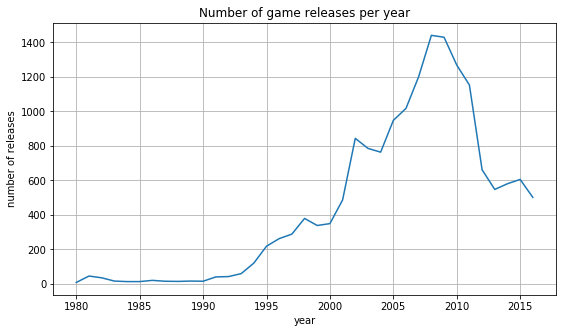

In [43]:
plt.figure(figsize=(9,5))
plt.title('Number of game releases per year')
plt.ylabel('number of releases')
plt.xlabel('year')
plt.plot(games_per_year.query('year_of_release > 0'))
plt.grid(True)

#### Как меняются продажи по платформам

Платформы с наибольшими суммарными продажами и постройте распределение по годам. 

In [44]:
def total_sales_per_platform_for(df):
    return (df
            .pivot_table(index='platform', values='total_sales', aggfunc='sum')
            .sort_values('total_sales', ascending=False)
    )

In [45]:
def bar_plot(df):
    (df
     .plot(kind='bar', y='total_sales', figsize=(10, 5), legend=False, grid=True)
     .set(xlabel='platform name', ylabel='total sales', title='Top plaforms'))
    plt.show()

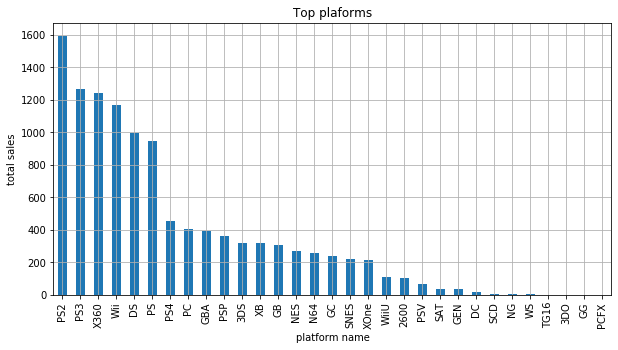

In [46]:
bar_plot(total_sales_per_platform_for(df))

Выведем топ-5 самых прибыльных платформ всех времён:

In [47]:
top_10_platforms = total_sales_per_platform_for(df).head(10)

In [48]:
top_10_platforms

,total_sales
platform,
PS2,1595.06
PS3,1269.94
X360,1242.18
Wii,1169.72
DS,995.01
PS,944.47
PS4,455.23
PC,401.96
GBA,393.10


Создадим распределение `total_sales` для каждой платформы по годам

__За какой характерный срок появляются новые и исчезают старые платформы?__

In [49]:
def yearly_total_sales_by_platform(name, df):
    
    return (df
            .query("platform == @name and year_of_release > 0")
            .pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')
            .sort_values('year_of_release', ascending=False))

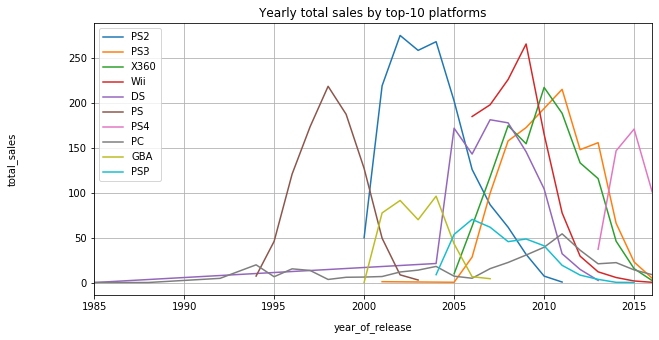

In [50]:
for platform in list(top_10_platforms.index):
    yearly_total_sales_by_platform(platform, df)['total_sales'].plot(figsize=(10, 5), label=platform)
    plt.title('Yearly total sales by top-10 platforms')
    plt.xlabel('year_of_release', labelpad=10)
    plt.ylabel('total_sales', labelpad=50)
    plt.grid(True)
    plt.legend()

 Примерно за 10 лет появляются новые платформы и исчезают старые. 
 
Данные за все периоды не понадобятся – определим актуальный период длиной в 10 лет и будес рассматривать на игры на современных платформах.

In [51]:
actual_years = (df['year_of_release'] > 2006) & (df['year_of_release'] <= 2016)
actual_df = df.loc[actual_years]

__Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ__

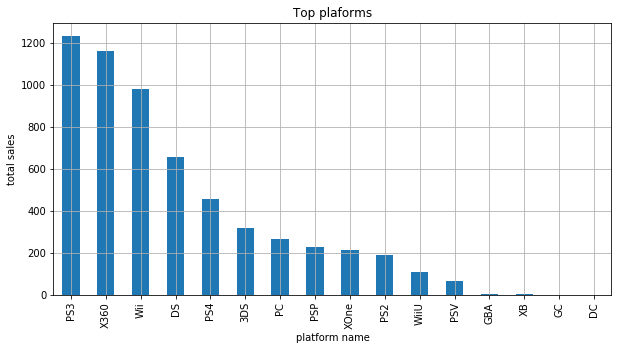

In [52]:
bar_plot(total_sales_per_platform_for(actual_df))

In [53]:
top_10_actual = total_sales_per_platform_for(actual_df).head(10)

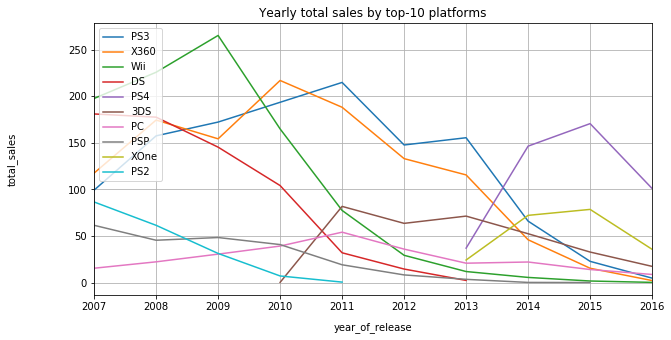

In [54]:
for platform in list(top_10_actual.index):
    yearly_total_sales_by_platform(platform, actual_df)['total_sales'].plot(figsize=(10, 5), label=platform)
    plt.title('Yearly total sales by top-10 platforms')
    plt.xlabel('year_of_release', labelpad=10)
    plt.ylabel('total_sales', labelpad=50)
    plt.grid(True)
    plt.legend(loc='upper left')

Потенциально перспективными выглядят `XOne` и `PS4`

Построим график «ящик с усами» по глобальным продажам игр в разбивке по перспективным платформам.

Mean total sales for PS4: 113.80750000000005
Mean total sales for XOne: 52.7275


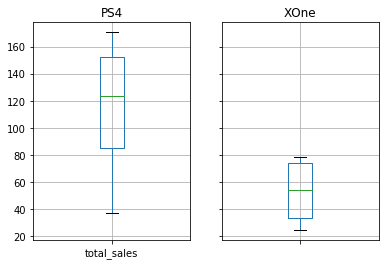

In [55]:
top_actual_platforms = ['PS4', 'XOne']

fig, axs = plt.subplots(1, 2, sharey=True)

for num, platform in enumerate(top_actual_platforms):
    df = yearly_total_sales_by_platform(platform, actual_df)
    print(f"Mean total sales for {platform}: {df['total_sales'].mean()}")
    df.boxplot('total_sales', ax=axs[num])
    axs[num].set_title(platform)

plt.tick_params(labelcolor='none', bottom='off')
plt.subplots_adjust(left=0.1)
plt.show()

Отметим, что сумма глобальных продаж игр для PS4 примерно в 2 раза больше чем у Xbox One

__Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков.__

 Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами.

In [56]:
ps4 = actual_df.query("platform == 'PS4'")
xone = actual_df.query("platform == 'XOne'")
features = ['user_score', 'critic_score', 'total_sales']

In [57]:
ps4[features].corr()

,user_score,critic_score,total_sales
user_score,1.000000,0.556897,-0.038308
critic_score,0.556897,1.000000,0.375152
total_sales,-0.038308,0.375152,1.000000


In [58]:
xone[features].corr()

,user_score,critic_score,total_sales
user_score,1.000000,0.466535,-0.067145
critic_score,0.466535,1.000000,0.375086
total_sales,-0.067145,0.375086,1.000000


In [59]:
def scatter_plot(x):
    ps4.plot(x=x, y='total_sales', kind='scatter', title='PS4',c='b', grid=True, alpha=0.3)
    xone.plot(x=x, y='total_sales', kind='scatter', title='Xbox One', c='m', grid=True, alpha=0.3)
    plt.show()

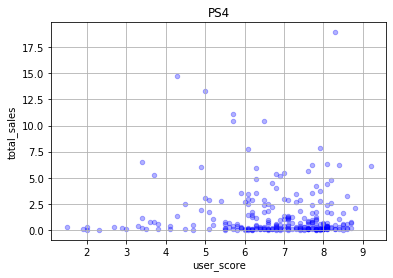

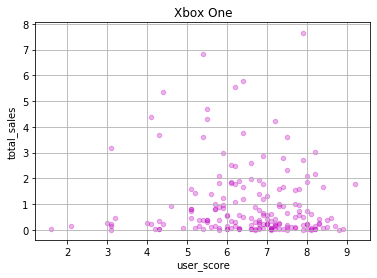

In [60]:
scatter_plot('user_score')

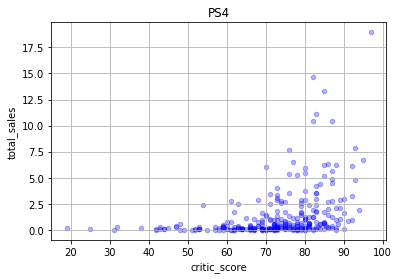

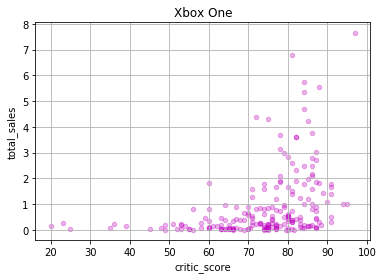

In [61]:
scatter_plot('critic_score')

Взаимосвязи между отзывами пользователей и продажами нет;

Взаимосвязь между отзывами критиков и продажами существует, однако не большая;

Взаимосязь между отзывами критиков и отзывами пользователей существует, чуть большая чем между отзывами критиков и продажами.

Корреляция не говорит о причинно-следственной связи. 

Хотя по диаграммам рассеяния видно, что чем выше оценки критиков, тем выше продажи игр на обоих платформах, нельзя однозначно утверждать, что высокие оценки критиками приводят к высоким продажам игр, а при покупке игры пользователи больше доверяют критикам, а не мнению знакомых геймеров.

__Посмотрим на общее распределение игр по жанрам__

- Что можно сказать о самых прибыльных жанрах? 
- Выделяются ли жанры с высокими и низкими продажами?

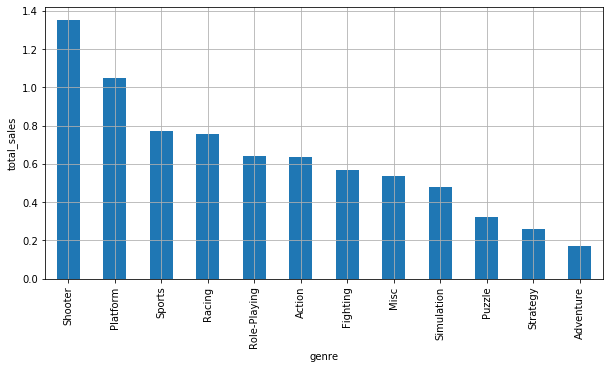

In [62]:
%matplotlib inline
(actual_df
    .pivot_table(index='genre', values='total_sales')
    .sort_values('total_sales', ascending=False)
    .plot(kind='bar', y='total_sales', figsize=(10, 5), legend=False, grid=True)
    .set(xlabel='genre', ylabel='total_sales'))
plt.show()

Наиболее популярные жанры – шутеры, платформеры, а также спортивные игры. 

Меньше всего прибыли приносят стратегии и приключенческие игры. 

Однако стоит учитывать региональные продажи, т.к. в разных регионах распределение по жанрам может быть другим.

### Шаг 4. Составьте портрет пользователя каждого региона

Определим для пользователя каждого региона (NA, EU, JP):
- Самые популярные платформы (топ-5). Опишите различия в долях продаж.
- Самые популярные жанры (топ-5). Поясните разницу.
- Влияет ли рейтинг ESRB на продажи в отдельном регионе?

In [63]:
def top5_in_region(col, region):
    return (actual_df
            .pivot_table(index=col, values=region, aggfunc='sum')
            .sort_values(region, ascending=False)
            .head())

In [64]:
def sales_pie(df,col, region):
    (df
     .plot(kind='pie', y=region, autopct='%1.0f%%', figsize=(10, 5), legend=False)
     .set(title='Total '+region+ ' by '+col))
    plt.show()

__Северная Америка (na)__

Топ-5 платформ:

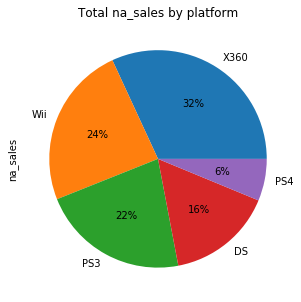

In [65]:
sales_pie(top5_in_region('platform', 'na_sales'),'platform', 'na_sales')

В северной Америке наиболее популярна XBox. 

Wii обходит консоль PS3(Sony) по продажам, что может оказаться странным для других регионов.

___
Топ-5 по жанрам:

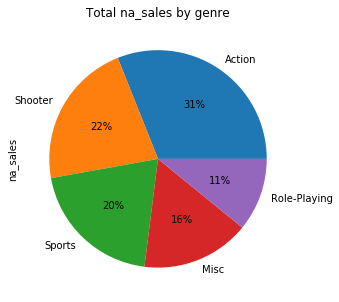

In [66]:
sales_pie(top5_in_region('genre', 'na_sales'),'genre', 'na_sales')

Экшены и шутеры – самые популярные жанры в северной Америке

Влияние рейтинга ESRB на продажи в регионе:

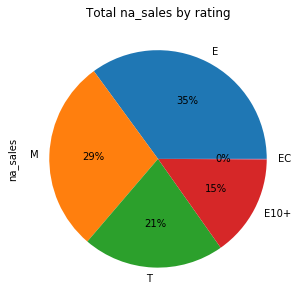

In [67]:
sales_pie(top5_in_region('rating', 'na_sales'),'rating', 'na_sales')

Бóльшая доля игр приходится на игры, подходящие для детей, и только 29% продаж на игры для взрослой аудитории 

__Европа (eu)__

Топ-5 платформ:

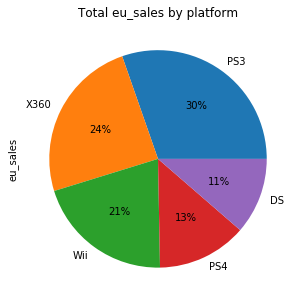

In [68]:
sales_pie(top5_in_region('platform', 'eu_sales'),'platform', 'eu_sales')

В Европе наиболее популярна PlayStation. Доля Wii в Европе меньше, чем в Северной Америке.

Топ-5 жанров:

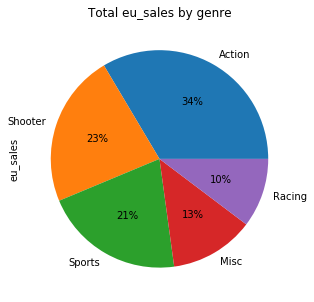

In [69]:
sales_pie(top5_in_region('genre', 'eu_sales'),'genre', 'eu_sales')

Наиболее популярны экшены и шутеры. Почти как в северной Америке. Япония должна быть разнообразнее в этом плане

Влияние рейтинга ESRB:

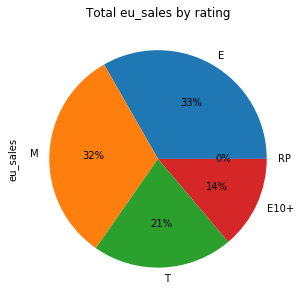

In [70]:
sales_pie(top5_in_region('rating', 'eu_sales'),'rating', 'eu_sales')

В Европе лучше продаются игры для взрослой аудитории: 35% по сравнению с 29% в Северной Америке

__Япония (jp)__

Топ-5 платформ:

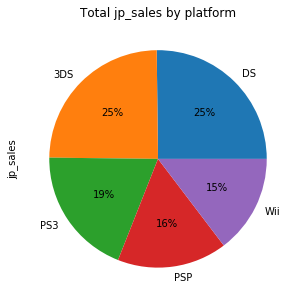

In [71]:
sales_pie(top5_in_region('platform', 'jp_sales'),'platform', 'jp_sales')

В Японии много играют на портативных консолях типа (3)DS, PSP и пр. 

Xbox не входит в пятёрку лидеров.

Топ-5 жанров:

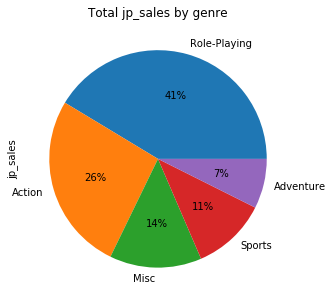

In [72]:
sales_pie(top5_in_region('genre', 'jp_sales'),'genre', 'jp_sales')

Ролевые игры – самые популярные. 

Жанр экшен отстаёт по продажам примерно в полтора раза относительно Европы и Северной Америки.

Влияние рейтинга ESRB:

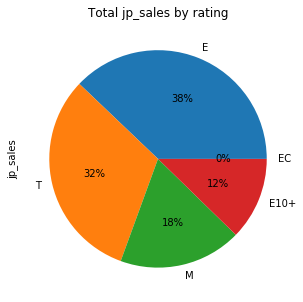

In [73]:
sales_pie(top5_in_region('rating', 'jp_sales'),'rating', 'jp_sales')

В Японии хуже всего продаются игры для взрослой аудитории – 17% продаж.

### Шаг 5. Проверьте гипотезы

- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.
- Задайте самостоятельно пороговое значение alpha.


Будем использовать t-тест, т.к. сравниваемые выборки независимы между собой.

In [74]:
def hypothesis(alpha, arr1, arr2, eq_var):
    res = st.ttest_ind(arr1, arr2,
                      equal_var = eq_var,  # Welch’s t-test
                      nan_policy = 'omit')

    print('p-значение:', res.pvalue)

    if res.pvalue < alpha:
        print("Отвергаем нулевую гипотезу")
    else:
        print("Не получилось отвергнуть нулевую гипотезу")

__Средние пользовательские рейтинги платформ Xbox One и PC одинаковые__

Рассматриваются две генеральные совокупности – игры на разных платформах

Нулевая гипотеза $H_0$:

Средние пользовательские рейтинги платформ Xbox One и PC **не различаются**
___
Альтернативная гипотеза $H_1$:

Средние пользовательские рейтинги платформ Xbox One и PC  **различаются**

___
$\alpha = 0.01$, т.к. в данных много выбросов

In [75]:
xone['user_score'].mean()

6.52142857142857

In [76]:
actual_df.query("platform == 'PC'")['user_score'].mean()

6.773024054982827

In [77]:
hypothesis(0.01, xone['user_score'], actual_df.query("platform == 'PC'")['user_score'], False)

p-значение: 0.03725371563086248
Не получилось отвергнуть нулевую гипотезу


Был получен p-value, равный ~4%. 

Если бы рейтинги пользователей НЕ отличались ($H^0$), то те различия, на которые указывает среднее величин,  могли бы получиться случайно лишь в 4% случаев. 

При заданном уровне значимости $\alpha=0.01$, не будем отклонять гипотезу, но при уровне значимости $\alpha=0.05$ её пришлось бы отвергнуть (подтверждение внизу).

Гипотеза о том, что средние пользовательские рейтинги платформ Xbox One и PC __одинаковые__ подтвердилась.

In [78]:
hypothesis(0.05, xone['user_score'], actual_df.query("platform == 'PC'")['user_score'], False)

p-значение: 0.03725371563086248
Отвергаем нулевую гипотезу


__Средние пользовательские рейтинги жанров Action и Sports разные__

Рассматриваются две генеральные сопокупности – игры разных жанров

Нулевая гипотеза $H_0$:

Средние пользовательские рейтинги жанров Action и Sports **не различаются**
___
Альтернативная гипотеза $H_1$:

Средние пользовательские рейтинги жанров Action и Sports **различаются**

In [79]:
(hypothesis(0.05, actual_df.query("genre == 'Action'")['user_score'],
            actual_df.query("genre == 'Sports'")['user_score'], True))

p-значение: 6.299284293219427e-13
Отвергаем нулевую гипотезу


Средние пользовательские рейтинги различаются, и практически нулевая вероятность ($6.3\cdot10^{-13}$) говорит о том, что случайно получить такое отличие в значениях практически невозможно.

Гипотеза о том, что пользовательские рейтинги жанров Action и Sports __разные__, подтвердилась.

### Шаг 6. Напишите общий вывод

В датасете было обнаружено очень много пропущенных данных:
- Пропуски в годе выхода были заполнены годом выхода игр на других платформах
- Пропущенные оценки критиков (самая большая доля пропусков) заполнены медианой по названиям игр
- Пропуски в `Rating` заполнены именам игр на других платформах 
___

- Больше всего игр выпускалось в 2005-2010 годах
- Платформы появляются и умирают в течение 10 лет - в соответствие с этим были выбраны наиболее перспективные платформы. 
- Взаимосвязи между отзывами пользователей и продажами нет
- Взаимосвязь между отзывами критиков и продажами существует, однако не большая
- Наиболее популярные на данный момент платформы – это Sony PlayStation 4 и Xbox One. 
    Они появились несколько лет назад (относительно 2016) и имеют потенциал роста.
___

- В США и Европе лучше всего продаются шутеры и экшены, преобладают PS3 и X360.
- Япония – отдельный рынок с уклоном в портативные консоли и ролевые игры.
- Больше всего продаж приходятся на игры, разрешенные для детей, вне зависимости от региона.
___
Обе сформулированные гипотезы подтвердились:
- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
- Средние пользовательские рейтинги жанров Action и Sports разные.
